In [8]:
# 모듈 미리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model 관련 모듈
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [9]:
#
Path = "~/data/data/bike-sharing-demand/train.csv"

In [10]:
# 데이터 train 변수로 가져오기
train = pd.read_csv(Path)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
# train feature 확인하기 - 결측값 없음
# datetime 자료형 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'].values)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [13]:
# datatime 컬럼을 datetime 자료형으로 변환하기
# 6가지 컬럼 만들기 
train['year'] = train["datetime"].dt.year
train['month'] = train["datetime"].dt.month
train['day'] = train["datetime"].dt.day
train['hour'] = train["datetime"].dt.hour
train['minute'] = train["datetime"].dt.minute
train['second'] = train["datetime"].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [14]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

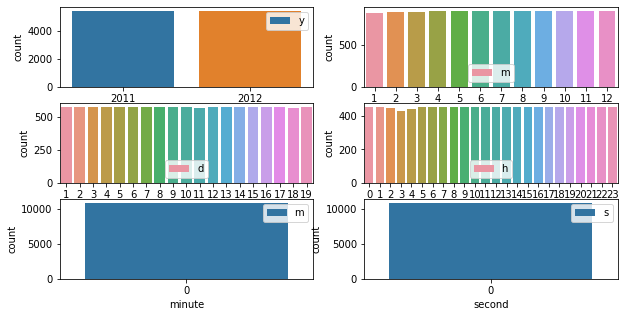

In [15]:
# year, month, day, hour, minute, second 데이터 개수 시각화하기
date_list = ['year', 'month', 'day', 'hour', 'minute', 'second']
plt.figure(figsize =(10,5))
for i in range(1,7):
  plt.subplot(3,2,i)
  sns.countplot(x=train[date_list[i-1]])
  plt.legend(date_list[i-1])

<AxesSubplot:>

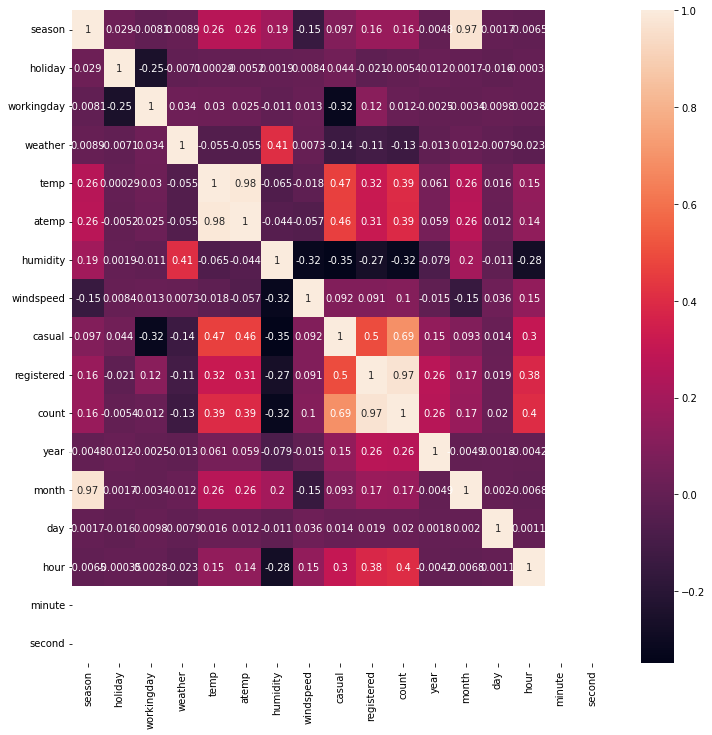

In [16]:
# 특성 뽑기
plt.figure(figsize= (12,12))
sns.heatmap(train.corr(), annot = True)

In [17]:
# corr 높은 feature 뽑기
train_var_corr = train.corr()['count']
train_feature = train_var_corr[(train_var_corr>0.1) | (train_var_corr< -0.1)].index.tolist()
train_feature

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'hour']

In [18]:
# feature 선정해서 데이터 X,y 생성
X = train[train_feature].drop(['count'], axis = 1)
y = train['count']
print("X", X.shape)
print("y", y.shape)
display(X.head())

X (10886, 11)
y (10886,)


,season,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hour
0,1,1,9.84,14.395,81,0.0,3,13,2011,1,0
1,1,1,9.02,13.635,80,0.0,8,32,2011,1,1
2,1,1,9.02,13.635,80,0.0,5,27,2011,1,2
3,1,1,9.84,14.395,75,0.0,3,10,2011,1,3
4,1,1,9.84,14.395,75,0.0,0,1,2011,1,4


In [19]:
X.describe()

,season,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,2011.501929,6.521495,11.541613
std,1.116174,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,0.500019,3.444373,6.915838
min,1.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,0.000000
25%,2.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,2011.000000,4.000000,6.000000
50%,3.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,2012.000000,7.000000,12.000000
75%,4.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,2012.000000,10.000000,18.000000
max,4.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,2012.000000,12.000000,23.000000


In [20]:
# train data, test data split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (8708, 11)
x_test (2178, 11)
y_train (8708,)
y_test (2178,)


In [21]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.fit(x_test)
scaler.transform(x_test)

array([[0.66666667, 0.        , 0.85106383, ..., 0.        , 0.54545455,
        0.47826087],
       [0.        , 0.        , 0.08510638, ..., 1.        , 0.        ,
        0.26086957],
       [1.        , 0.        , 0.23404255, ..., 0.        , 1.        ,
        0.7826087 ],
       ...,
       [1.        , 0.        , 0.40425532, ..., 1.        , 0.90909091,
        0.60869565],
       [0.        , 0.        , 0.27659574, ..., 1.        , 0.        ,
        0.2173913 ],
       [0.33333333, 1.        , 0.65957447, ..., 1.        , 0.36363636,
        0.56521739]])

In [22]:
# 모델 생성
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred


array([127.,  13., 163., ..., 509.,   5., 239.])

In [23]:
# mse rmse 출력
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
print("mse",mse)
print("rmse",rmse)

mse 7.678829830593002e-26
rmse 2.7710701598106466e-13


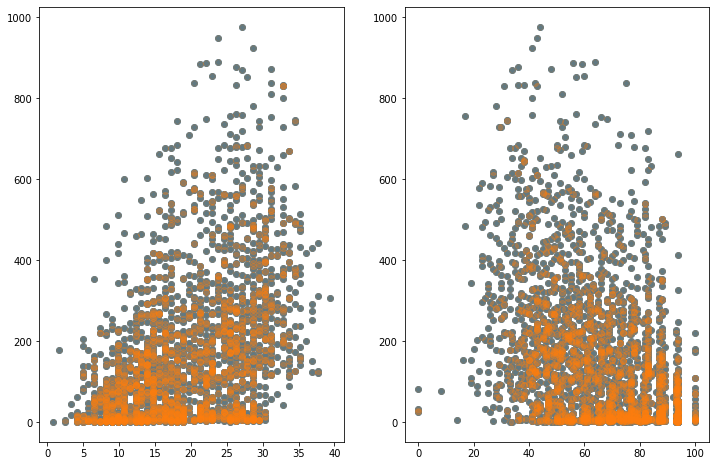

In [24]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
prediction_visual_list = [ 'temp','humidity']
plt.figure(figsize=(12,8))
for i in range(0,len(prediction_visual_list)):
  plt.subplot(1,2,i+1)
  plt.scatter(x=x_test[prediction_visual_list[i]],y=y_test)
  plt.scatter(x=x_test[prediction_visual_list[i]],y=y_pred, alpha = 0.3)